In [1]:
%matplotlib notebook
import pandas as pd
import lightkurve as lk
from del_scu_search import *
import matplotlib.pyplot as plt
from ptv_search import *

TIC 179575669
LightCurveFileCollection of 3 objects:
TessLightCurveFile(TICID: 179575669) 
TessLightCurveFile(TICID: 179575669) 
TessLightCurveFile(TICID: 179575669) 

25.946955970797717
26.295610058025204
21.77212088728902


<IPython.core.display.Javascript object>


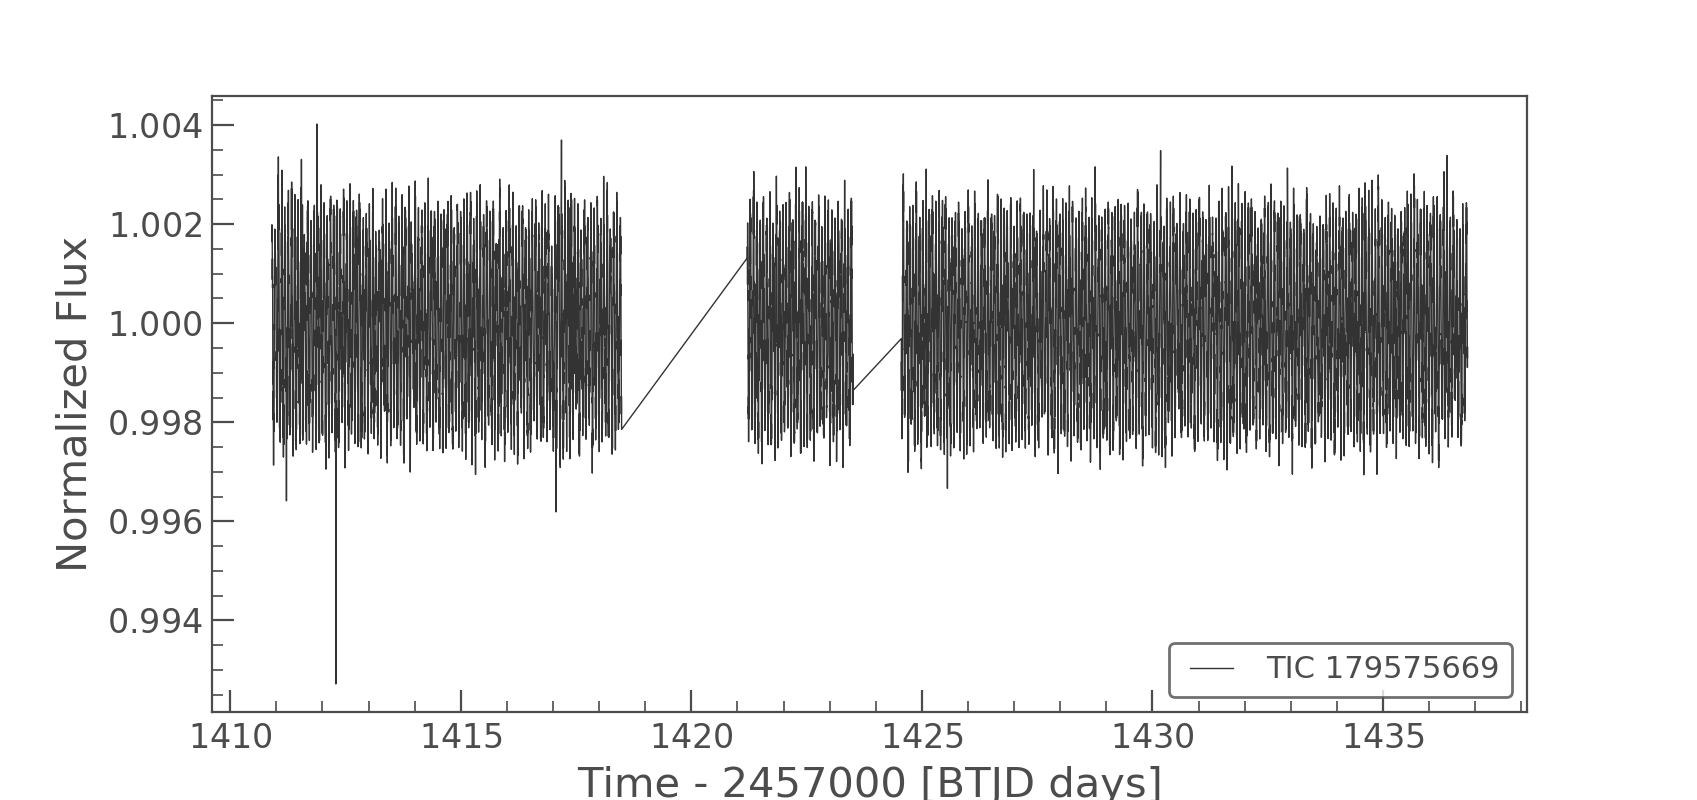

In [8]:
astars = pd.read_csv('tessAstars.csv')
star  = astars['ID'][0]

ticid = 'TIC ' + str(star)
print(ticid)
lcs = lk.search_lightcurvefile(ticid).download_all()
lc = None
print(lcs)
#concatenate the available TESS sectors crudely
for lcfile in lcs:
    if lc is None:
        print(lcfile.time[-1]-lcfile.time[0])
        lc = lcfile.PDCSAP_FLUX.normalize().flatten(window_length=201,break_tolerance=10)
    else:
        print(lcfile.time[-1]-lcfile.time[0])
        lc = lc.append(lcfile.PDCSAP_FLUX.normalize().flatten(window_length=201,break_tolerance=10))

lc = lc.remove_nans()
lc.plot()

[  14.16414296  705.84324398  734.17152991 1425.79664291 1425.85063093
 1454.12492883 1454.17891685]
14.152574099334807


<IPython.core.display.Javascript object>


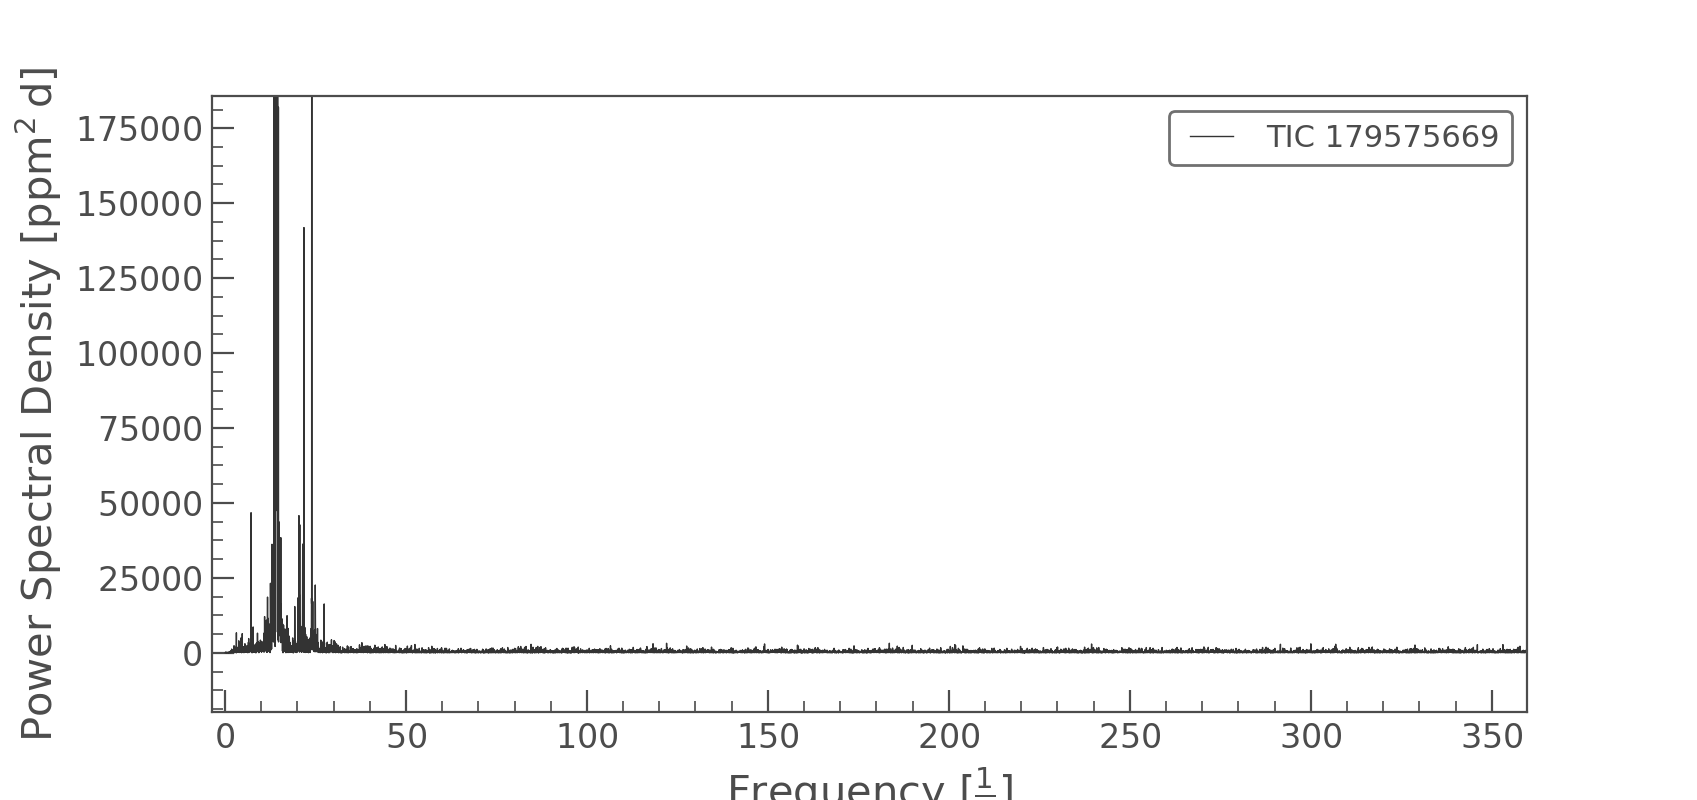

In [4]:
del_scu = is_delta_scuti(lc)
if del_scu is not False:
    print(del_scu)
    pg = lc.to_periodogram()
    freqs = [pg.frequency_at_max_power.value]
    print(pg.frequency_at_max_power.value)
    pg.plot()